# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# Importing & Loading the dataset

In [3]:
df = pd.read_csv('C:\\Users\\USER\\Desktop\\Python\\Tripjack\\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


# Dataset Info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


# Dataset Shape:

In [6]:
df.shape

(381, 13)

# Statistical Measures

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3571.440828,1293.375503,104.633136,340.295858,0.866864
std,1427.440692,2448.339459,28.977148,69.474040,0.340225
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2540.250000,0.000000,89.250000,360.000000,1.000000
50%,3329.500000,918.000000,110.000000,360.000000,1.000000
75%,4268.250000,2000.000000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Data Cleaning
## Checking the Missing Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

## Filling the Missing Values in numerical columns "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [10]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

## Confirming if there is any missing value in 'LoanAmount' & 'Credit_History'

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## No missing values in the numerical columns 'LoanAmount' & 'Credit_History'
## Dropping all the remaining missing values of the categorical columns

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 Here, we have dropped all the missing values to avoid disturbances in the model.
 
 ##### The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

## Final Data Shape

In [17]:
df.shape

(338, 13)

# Analyzing values assigned to columns

In [2]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']


print('Categorical Columns: ')
print(categorical_columns)

print('-'*130)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print('Numerical Columns: ')
print(numerical_columns)

Categorical Columns: 
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
----------------------------------------------------------------------------------------------------------------------------------
Numerical Columns: 
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


# Exploratory Data Analysis (EDA)

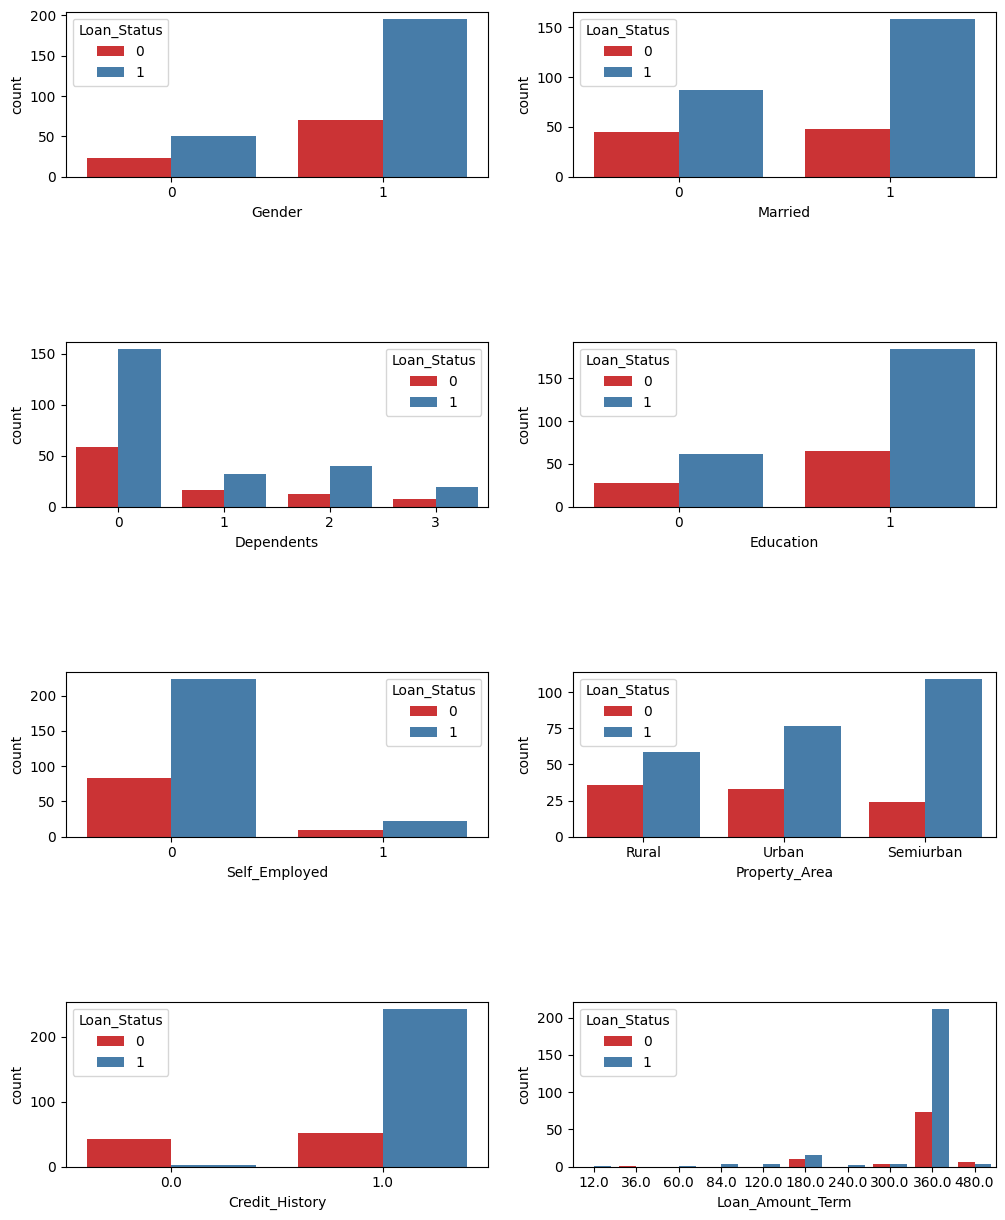

In [74]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col], palette='Set1')

plt.subplots_adjust(hspace=1)
plt.show()

# Observations

#### Plots above convey following things about the dataset:

1.   Loan Approval Status: About 2/3rd of applicants have been granted loan.
2.   Gender: There are more Men than Women (approx. 3x)
3.   Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4.   Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5.   Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6.   Employment: 5/6th of population is not self employed.
7.   Property Area: More applicants from Semi-urban and also likely to be granted loans.
8.   Applicant with credit history are far more likely to be accepted.
9.   Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

## Analyzing Numerical Data

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       338.000000         338.000000  338.000000
mean       3571.440828        1293.375503  104.633136
std        1427.440692        2448.339459   28.977148
min         150.000000           0.000000    9.000000
25%        2540.250000           0.000000   89.250000
50%        3329.500000         918.000000  110.000000
75%        4268.250000        2000.000000  128.000000
max        9703.000000       33837.000000  150.000000


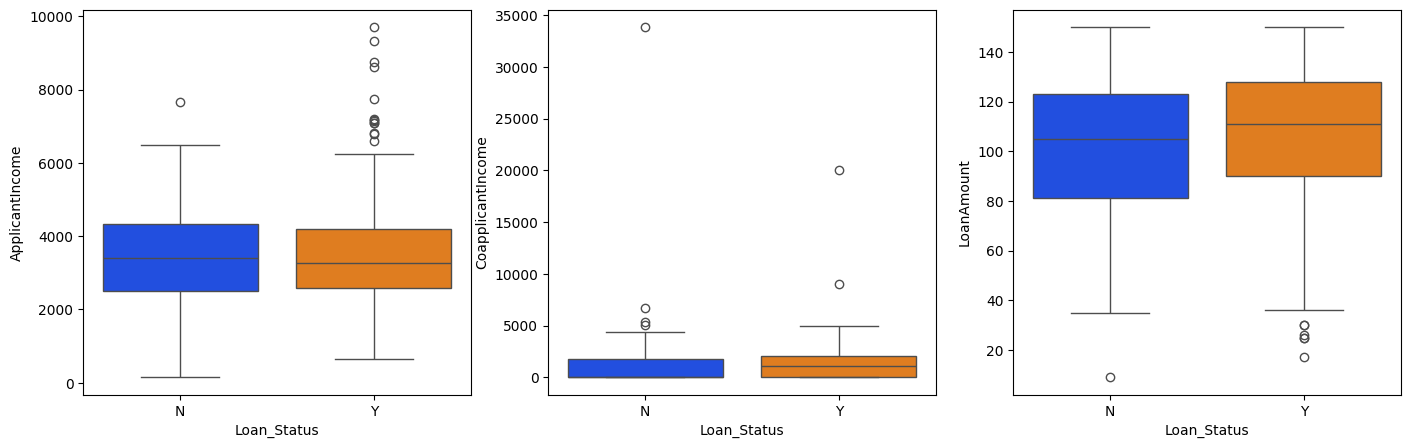

In [65]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx], palette='bright')

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

### For Numercical Columns, there is no significant relation to Loan approval status.

Highest number of loans were applied in Semi-urban aera, followed by Urban and Rural area.

Partten of Loan Approval or Rejection is nearly same in all of the three property areas.

The property area has little impact on the Loan Approval chances.

### Replacing the Variable values to Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model. 

In [66]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [67]:
df['Loan_Status'].value_counts()

Loan_Status
1    245
0     93
Name: count, dtype: int64

In [68]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    265
0     73
Name: count, dtype: int64

In [69]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    206
0    132
Name: count, dtype: int64

In [70]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    212
2     52
1     48
3     26
Name: count, dtype: int64

In [71]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

Education
1    249
0     89
Name: count, dtype: int64

In [72]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    306
1     32
Name: count, dtype: int64

In [75]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    133
2    110
0     95
Name: count, dtype: int64

In [76]:
df['Credit_History'].value_counts()

Credit_History
1.0    293
0.0     45
Name: count, dtype: int64

### Final DataFrame

In [77]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Splitting the data into Train and Test set

In [82]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Logistic Regression (LR)

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

## Sigmoid Function

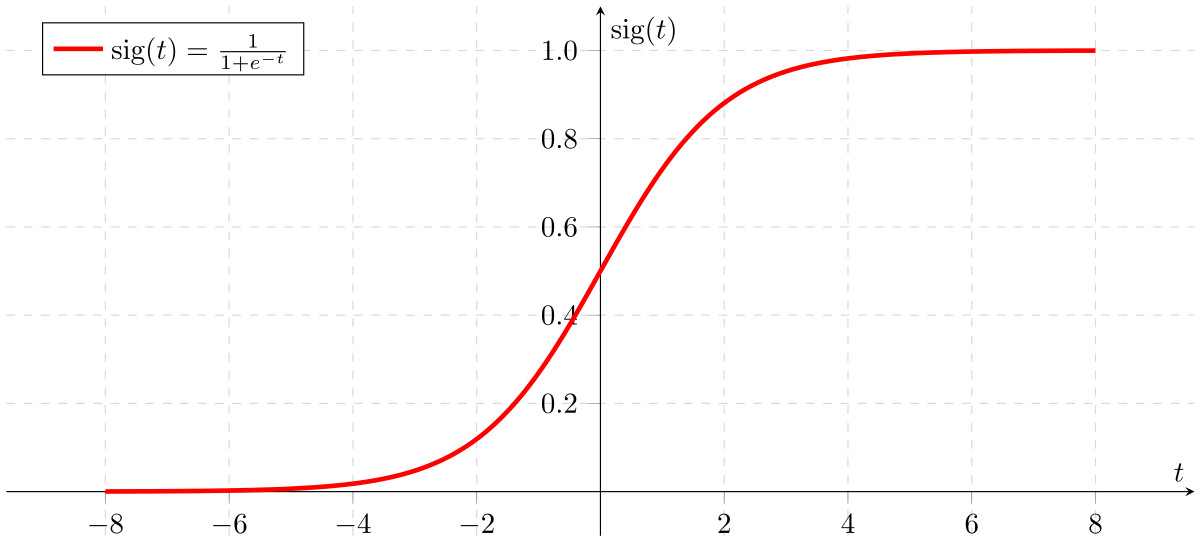

In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.8627450980392157


In [91]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1]
y_test [1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1]


# CONCLUSION:

1. The Loan Status is heavily dependent on the Credit History for Predictions.
   
2. The Logistic Regression Algorithm gives us the Accuracy of 86% (approx).